In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [28]:
FLT = pd.read_excel('Jianing_FLT.xlsx')
# FLT.set_index('Date',inplace=True)
print(FLT.columns)
print(FLT.head())



Index(['Date', 'FLT GEM Debiet influent even kant',
       'FLT GEM Debiet influent oneven kant', 'FLT GEM Turb influent oneven',
       'FLT GEM Turb influent even'],
      dtype='object')
                 Date  FLT GEM Debiet influent even kant  \
0 2020-12-31 15:00:00                        2965.654955   
1 2020-12-31 16:00:00                        2959.352060   
2 2020-12-31 17:00:00                        3009.247133   
3 2020-12-31 18:00:00                        3097.382712   
4 2020-12-31 19:00:00                        3014.303905   

   FLT GEM Debiet influent oneven kant  FLT GEM Turb influent oneven  \
0                          3483.320557                      0.430411   
1                          3496.040518                      0.522836   
2                          3062.499873                      0.512069   
3                          1853.906166                      0.450545   
4                          2485.336366                      0.405494   

   FLT GEM Turb 

In [29]:
print(FLT.isnull().sum())
FLT['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)


Date                                     0
FLT GEM Debiet influent even kant      438
FLT GEM Debiet influent oneven kant    502
FLT GEM Turb influent oneven           527
FLT GEM Turb influent even             442
dtype: int64


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_12768\3840469032.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FLT['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_12768\3260174259.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


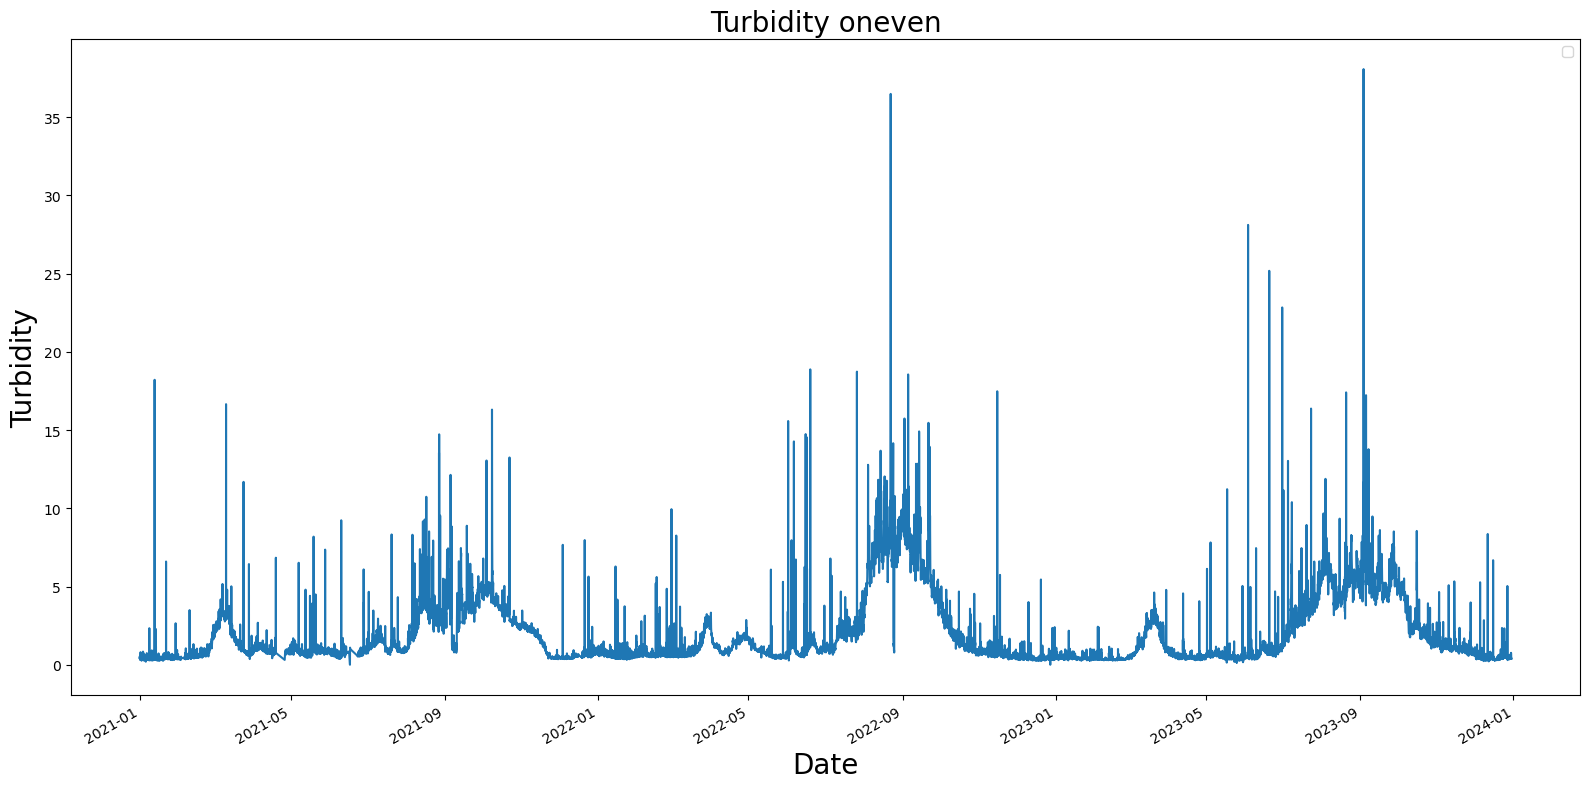

In [30]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(FLT['Date'], FLT['FLT GEM Turb influent oneven'])
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Turbidity', fontsize=20)
ax.set_title('Turbidity oneven', fontsize=20)

fig.autofmt_xdate() 
plt.legend()
plt.tight_layout()

plt.savefig('figures/baseline models/Turbidity oneven.png', dpi=300)

In [31]:
advanced_decomposition = STL(FLT['FLT GEM Turb influent oneven'],period=24).fit()

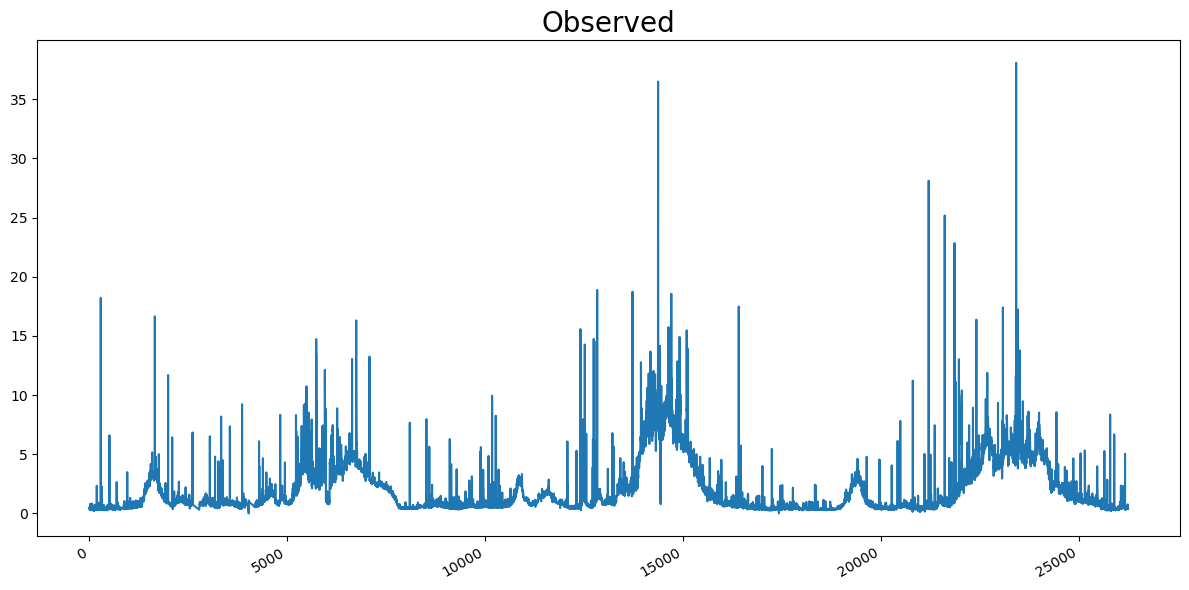

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.observed)
ax.set_title('Observed', fontsize=20)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/baseline models/Observed_oneven.png', dpi=300)

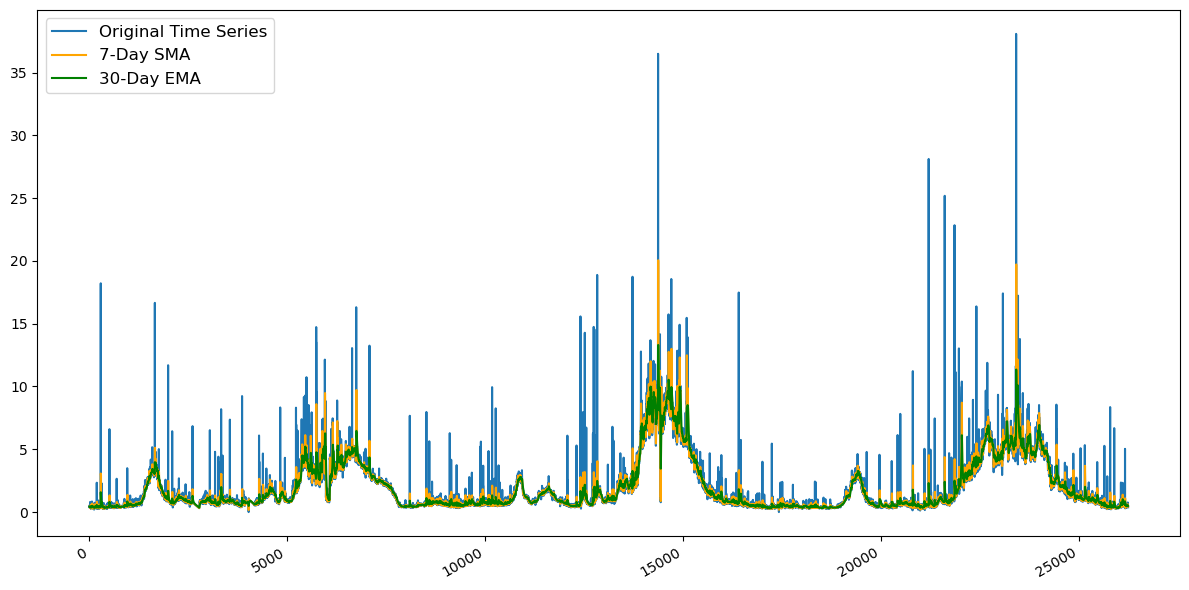

In [33]:
sma_window = 7  # 7-day moving average
sma = FLT['FLT GEM Turb influent oneven'].rolling(window=sma_window).mean()
sma

ema_window = 30  # 30-day moving average
ema = FLT['FLT GEM Turb influent oneven'].ewm(span=ema_window, adjust=False).mean()
ema

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(FLT['FLT GEM Turb influent oneven'], label='Original Time Series')
ax.plot(sma, label=f'{sma_window}-Day SMA', color = 'orange')
ax.plot(ema, label=f'{ema_window}-Day EMA', color='green')

ax.legend(loc='best', fontsize=12)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/baseline models/EMA_comparison', dpi=300)

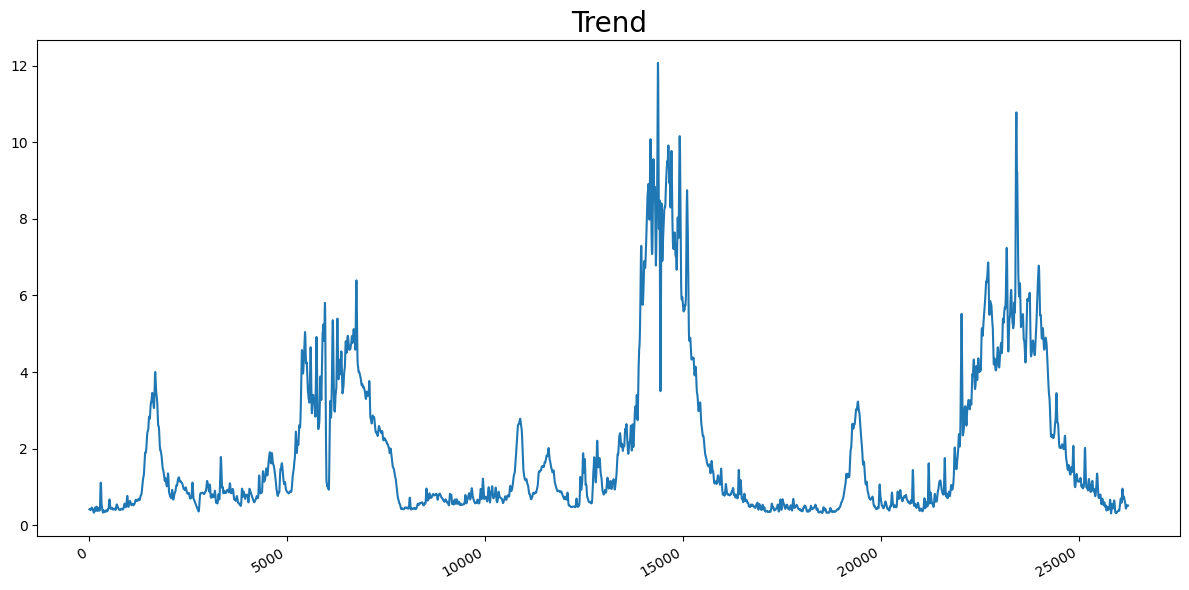

In [34]:

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.trend)
ax.set_title('Trend', fontsize=20)


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/baseline models/Trend_oneven', dpi=300)

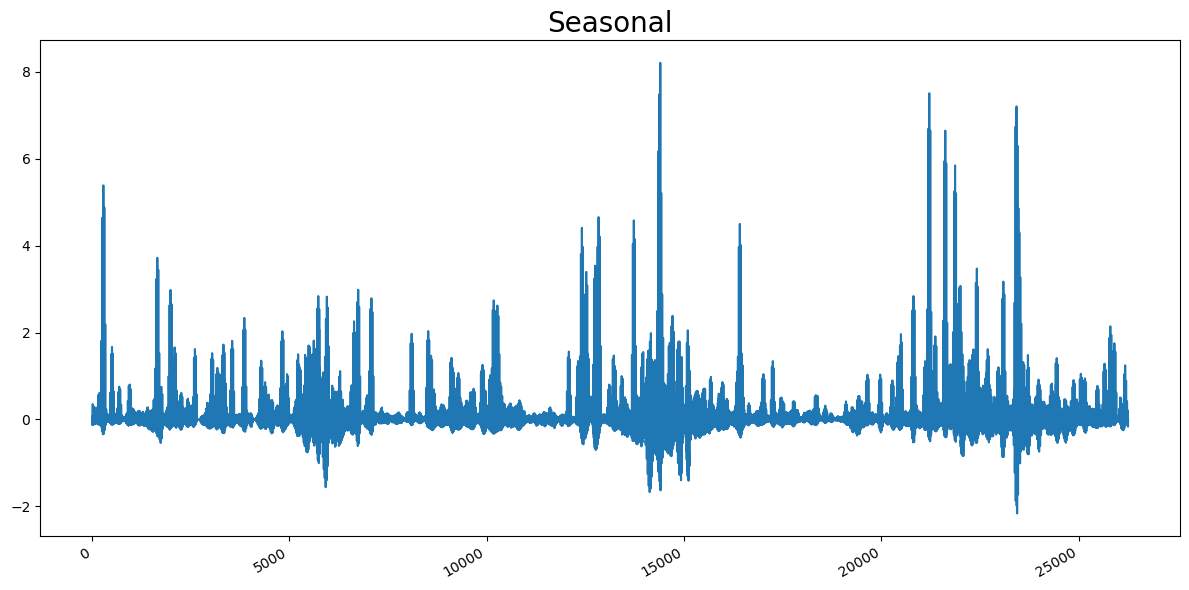

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.seasonal)
ax.set_title('Seasonal', fontsize=20)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/baseline models/Seasonal_oneven.png', dpi=300)

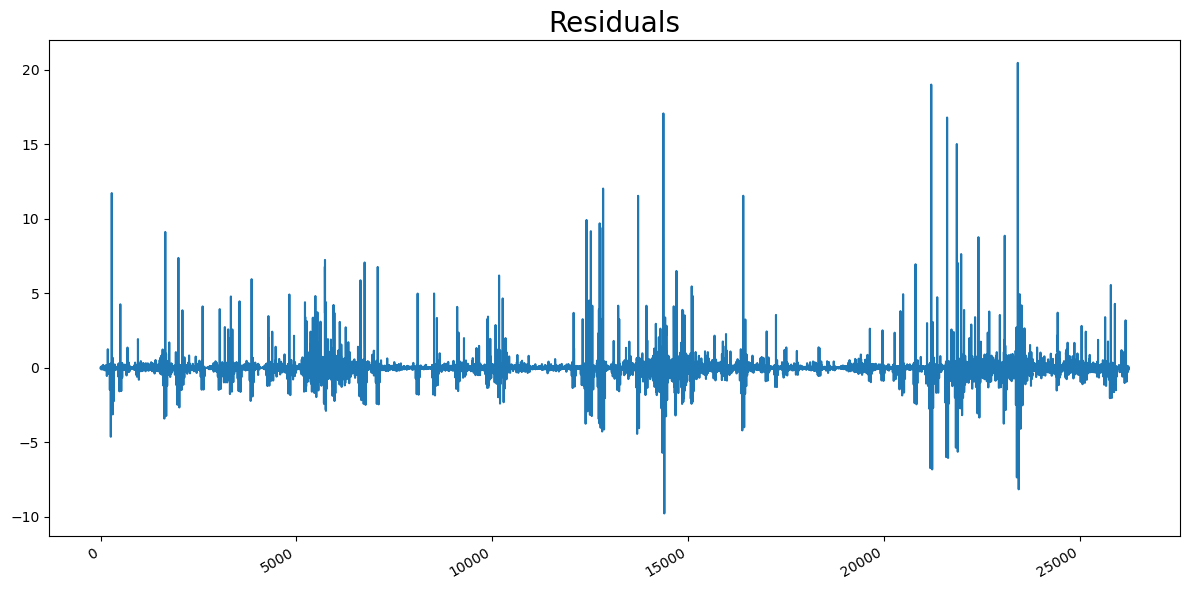

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(advanced_decomposition.resid)
ax.set_title('Residuals', fontsize=20)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/baseline models/Residuals_oneven.png', dpi=300)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

# Plot data with train/test split 

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_12768\926898705.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


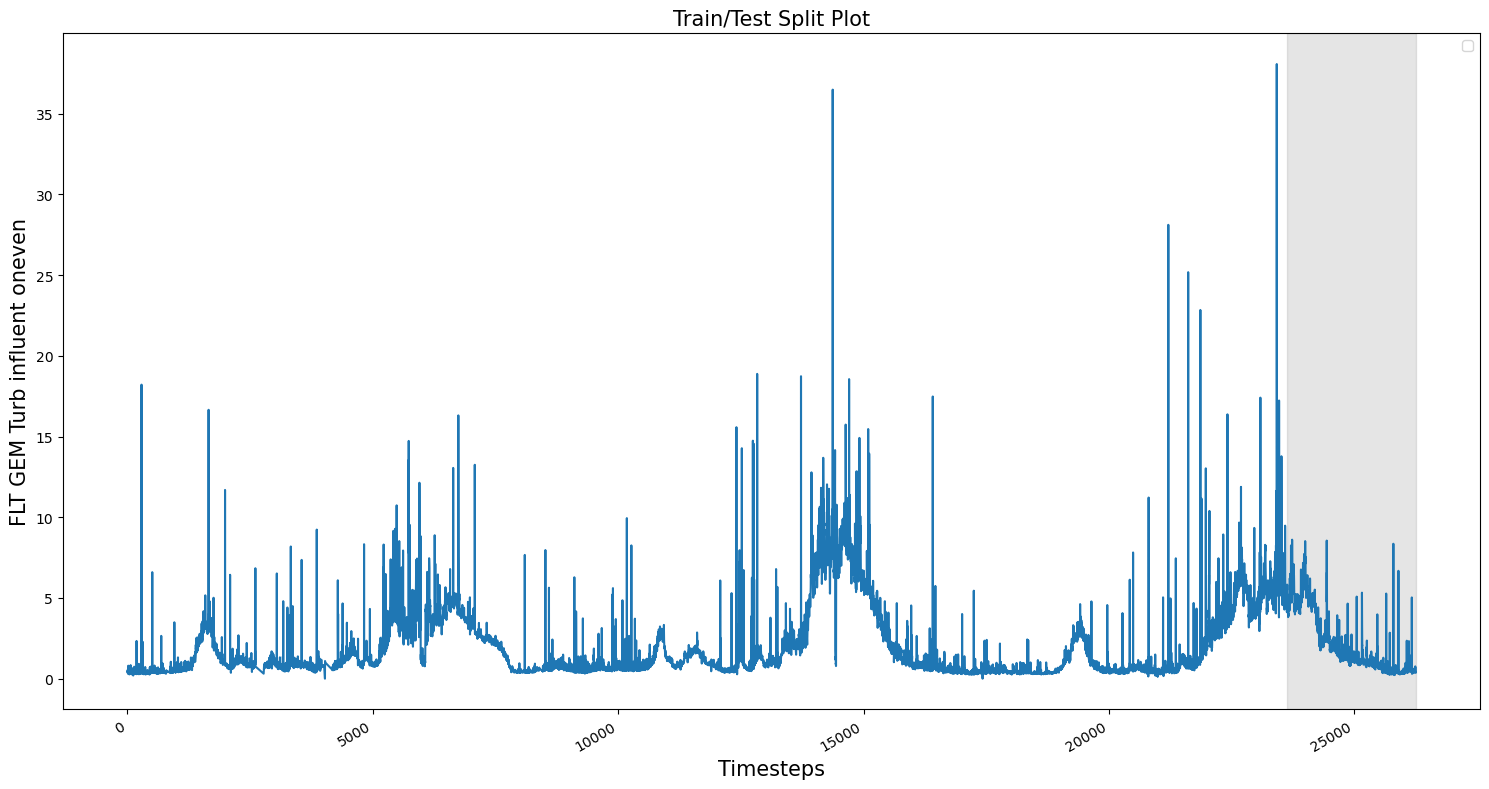

In [38]:

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(FLT['FLT GEM Turb influent oneven'])

ax.set_xlabel('Timesteps',fontsize=15)
ax.set_ylabel('FLT GEM Turb influent oneven',fontsize=15)
ax.set_title('Train/Test Split Plot',fontsize=15)

ax.axvspan(23626, 26250, color='#808080', alpha=0.2)
ax.legend()

fig.autofmt_xdate()

plt.tight_layout()

plt.savefig('figures/train_test_split_plot.png', dpi=300)

plt.show()

In [39]:
train = FLT[:23626]
test = FLT[23626:]
# print(train)
print(test)


                     Date  FLT GEM Debiet influent even kant  \
23626 2023-09-12 01:00:00                        1960.184374   
23627 2023-09-12 02:00:00                        2002.938522   
23628 2023-09-12 03:00:00                        2362.711528   
23629 2023-09-12 04:00:00                        2926.862545   
23630 2023-09-12 05:00:00                        2952.769291   
...                   ...                                ...   
26246 2023-12-30 05:00:00                        2514.307238   
26247 2023-12-30 06:00:00                        2504.993905   
26248 2023-12-30 07:00:00                        2508.532285   
26249 2023-12-30 08:00:00                        2508.574482   
26250 2023-12-30 09:00:00                        2523.169808   

       FLT GEM Debiet influent oneven kant  FLT GEM Turb influent oneven  \
23626                          1981.699527                      4.165461   
23627                          1969.698242                      4.117454   
236

# Predict historical mean 

In [40]:
print(train.columns)


Index(['Date', 'FLT GEM Debiet influent even kant',
       'FLT GEM Debiet influent oneven kant', 'FLT GEM Turb influent oneven',
       'FLT GEM Turb influent even'],
      dtype='object')


In [41]:
historical_mean = np.mean(train['FLT GEM Turb influent oneven'])
print(historical_mean)



1.8830153980884878


In [42]:
test.loc[:, 'pred_mean'] = historical_mean
print(test.columns)


Index(['Date', 'FLT GEM Debiet influent even kant',
       'FLT GEM Debiet influent oneven kant', 'FLT GEM Turb influent oneven',
       'FLT GEM Turb influent even', 'pred_mean'],
      dtype='object')


In [43]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [44]:
mape_hist_mean = mape(test['FLT GEM Turb influent oneven'], test['pred_mean'])
print(mape_hist_mean)

133.2443358132938


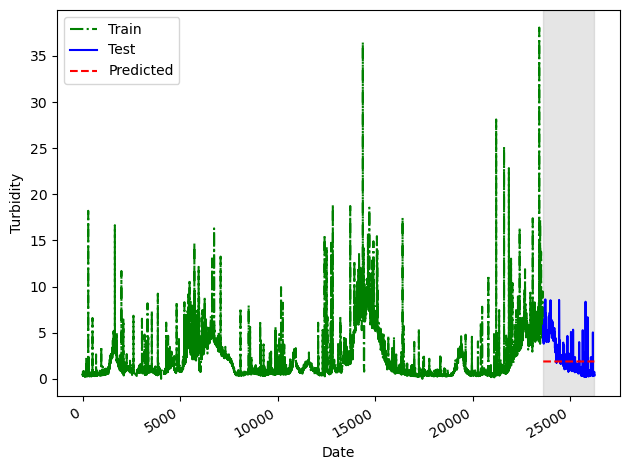

In [45]:
fig, ax = plt.subplots()

ax.plot(train.index, train['FLT GEM Turb influent oneven'], 'g-.', label='Train')
ax.plot(test.index, test['FLT GEM Turb influent oneven'], 'b-', label='Test')
ax.plot(test.index, test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Turbidity')
ax.axvspan(23626, 26251, color='#808080', alpha=0.2)
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

# Predict last year's mean 

In [46]:
print(train[14865:23626])
print(train['FLT GEM Turb influent oneven'][14865:23626])


                     Date  FLT GEM Debiet influent even kant  \
14865 2022-09-12 00:00:00                        2987.363929   
14866 2022-09-12 01:00:00                        3000.529582   
14867 2022-09-12 02:00:00                        3002.425412   
14868 2022-09-12 03:00:00                        2995.817635   
14869 2022-09-12 04:00:00                        2986.371824   
...                   ...                                ...   
23621 2023-09-11 20:00:00                        2999.321317   
23622 2023-09-11 21:00:00                        2653.087446   
23623 2023-09-11 22:00:00                        2553.330837   
23624 2023-09-11 23:00:00                        2054.454201   
23625 2023-09-12 00:00:00                        1991.302421   

       FLT GEM Debiet influent oneven kant  FLT GEM Turb influent oneven  \
14865                          2997.444224                      7.095450   
14866                          3024.007528                      6.650919   
148

In [47]:
last_year_mean = np.mean(train['FLT GEM Turb influent oneven'][14865:23626])
print(last_year_mean)

1.8960059326622798


In [48]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

print(test)

                     Date  FLT GEM Debiet influent even kant  \
23626 2023-09-12 01:00:00                        1960.184374   
23627 2023-09-12 02:00:00                        2002.938522   
23628 2023-09-12 03:00:00                        2362.711528   
23629 2023-09-12 04:00:00                        2926.862545   
23630 2023-09-12 05:00:00                        2952.769291   
...                   ...                                ...   
26246 2023-12-30 05:00:00                        2514.307238   
26247 2023-12-30 06:00:00                        2504.993905   
26248 2023-12-30 07:00:00                        2508.532285   
26249 2023-12-30 08:00:00                        2508.574482   
26250 2023-12-30 09:00:00                        2523.169808   

       FLT GEM Debiet influent oneven kant  FLT GEM Turb influent oneven  \
23626                          1981.699527                      4.165461   
23627                          1969.698242                      4.117454   
236

In [49]:
mape_last_year_mean = mape(test['FLT GEM Turb influent oneven'], test['pred__last_yr_mean'])
print(mape_last_year_mean)

134.30762695173132


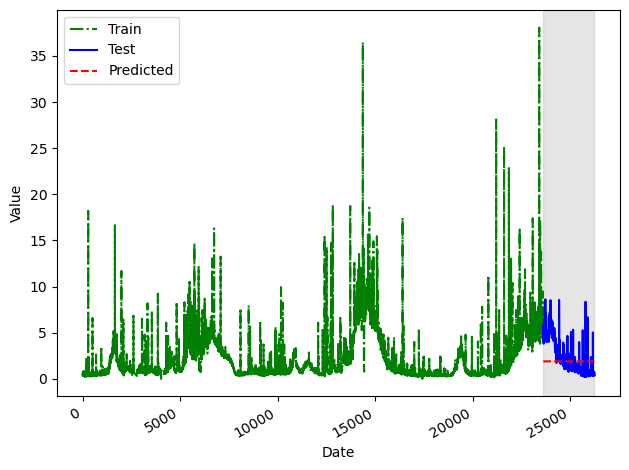

In [50]:
fig, ax = plt.subplots()

ax.plot(train.index, train['FLT GEM Turb influent oneven'], 'g-.', label='Train')
ax.plot(test.index, test['FLT GEM Turb influent oneven'], 'b-', label='Test')
ax.plot(test.index, test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.axvspan(23626, 26251, color='#808080', alpha=0.2)
ax.legend(loc=2)



fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [51]:
last = train['FLT GEM Turb influent oneven'].iloc[-1]
print(last)

4.45461845483871


In [52]:
test.loc[:, 'pred_last'] = last


In [53]:
mape_last = mape(test['FLT GEM Turb influent oneven'], test['pred_last'])
print(mape_last)

370.5219668088486


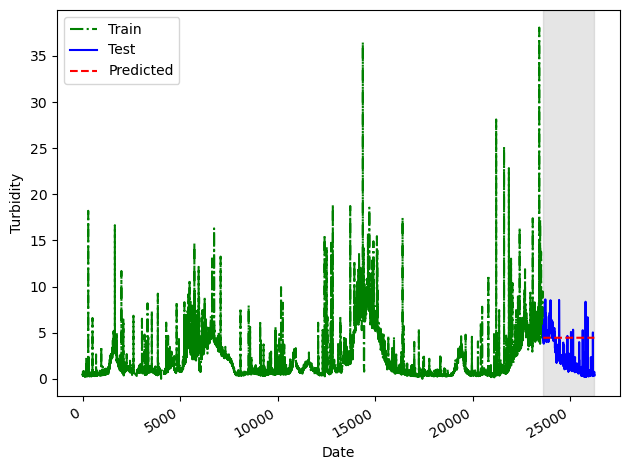

In [55]:
fig, ax = plt.subplots()

ax.plot(train.index, train['FLT GEM Turb influent oneven'], 'g-.', label='Train')
ax.plot(test.index, test['FLT GEM Turb influent oneven'], 'b-', label='Test')
ax.plot(test.index, test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Turbidity')
ax.axvspan(23626, 26251, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

In [56]:
print(train['FLT GEM Turb influent oneven'][14866:17491])
print(train[14866:17491])

14866    6.650919
14867    6.501670
14868    6.435025
14869    6.356828
14870    6.191239
           ...   
17486    0.295455
17487    0.444224
17488    0.398438
17489    0.421508
17490    0.505940
Name: FLT GEM Turb influent oneven, Length: 2625, dtype: float64
                     Date  FLT GEM Debiet influent even kant  \
14866 2022-09-12 01:00:00                        3000.529582   
14867 2022-09-12 02:00:00                        3002.425412   
14868 2022-09-12 03:00:00                        2995.817635   
14869 2022-09-12 04:00:00                        2986.371824   
14870 2022-09-12 05:00:00                        3001.531234   
...                   ...                                ...   
17486 2022-12-30 05:00:00                        2496.444499   
17487 2022-12-30 06:00:00                        2660.671317   
17488 2022-12-30 07:00:00                        2990.935547   
17489 2022-12-30 08:00:00                        3005.350945   
17490 2022-12-30 09:00:00        

In [57]:
test.loc[:, 'pred_last_season'] = train['FLT GEM Turb influent oneven'][14866:17491].values


In [58]:
mape_naive_seasonal = mape(test['FLT GEM Turb influent oneven'], test['pred_last_season'])
print(mape_naive_seasonal)

36.68120926492179


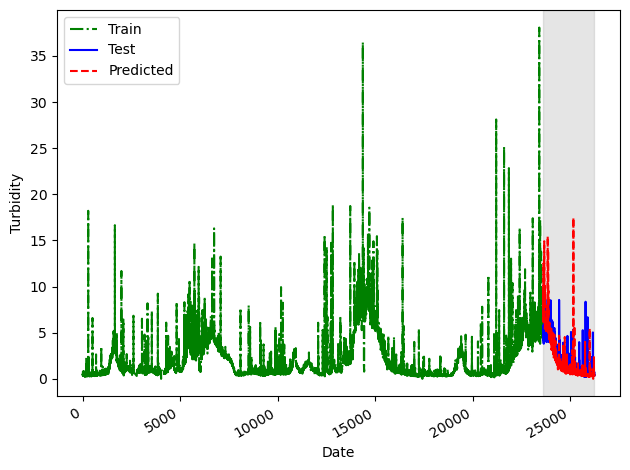

In [59]:
fig, ax = plt.subplots()

ax.plot(train.index, train['FLT GEM Turb influent oneven'], 'g-.', label='Train')
ax.plot(test.index, test['FLT GEM Turb influent oneven'], 'b-', label='Test')
ax.plot(test.index, test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Turbidity')
ax.axvspan(23626, 26250, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

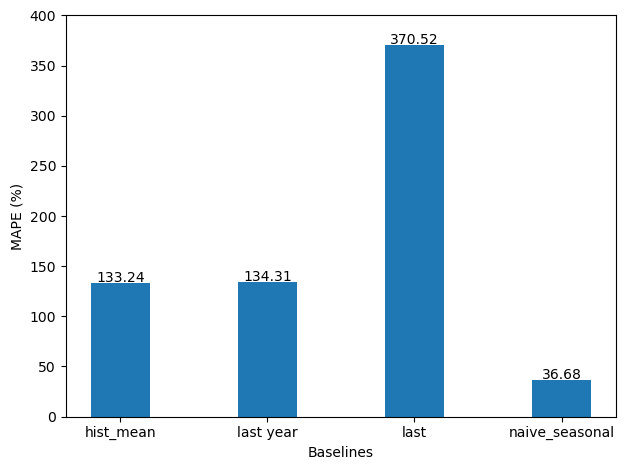

In [60]:
fig, ax = plt.subplots()

x = ['hist_mean','last year', 'last', 'naive_seasonal']
y = [133.24, 134.31, 370.52, 36.68]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 400)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)